In [129]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from scipy.sparse import linalg
from scipy.sparse.linalg import eigs

In [3]:
# (2)
N=100

ellipse=np.zeros((N+1,2))
for i in range(N+1):
    theta=( -1 * np.pi )/ 4 + (( 11 * np.pi ) / ( 12 * N ) * i)
    ellipse[i][0]=200*np.cos(theta)
    ellipse[i][1]=150*np.sin(theta)

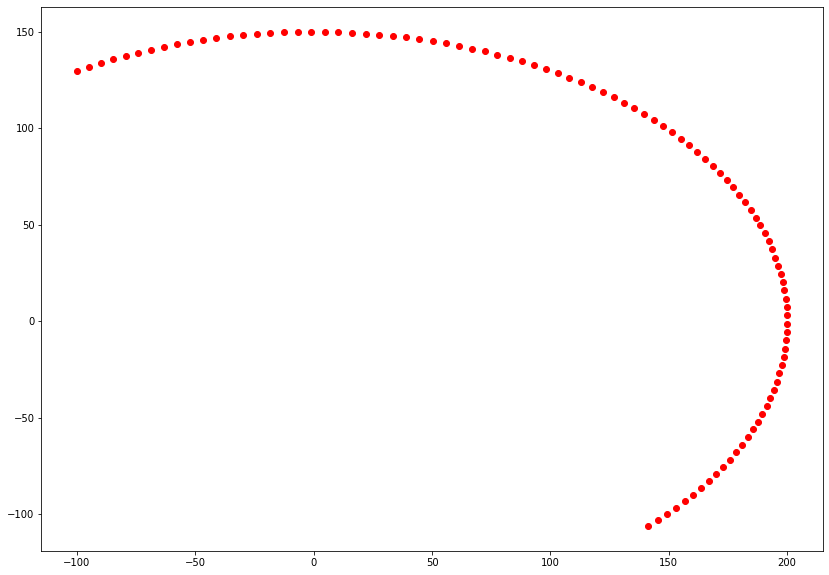

In [5]:
plt.figure(figsize=(14, 10))
plt.plot(ellipse[:, 0], ellipse[:, 1], color="red", linestyle="None", marker='o')

In [10]:
# (3)
sample=np.zeros((N+1,2))
for i in range(N+1):
    sample[i][0]=ellipse[i][0]+random.gauss(0,sigma=2.0)
    sample[i][1]=ellipse[i][1]+random.gauss(0,sigma=2.0)

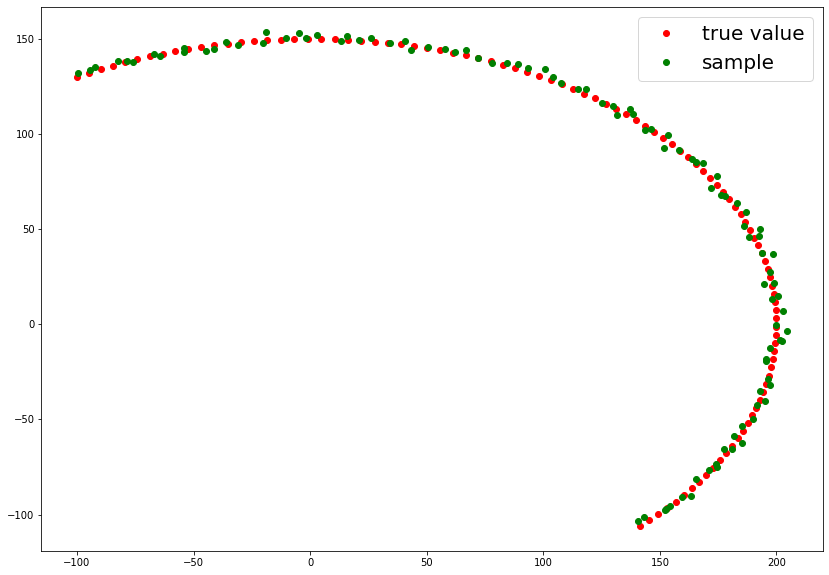

In [11]:
plt.figure(figsize=(14, 10))
plt.plot(ellipse[:, 0], ellipse[:, 1], color="red", linestyle="None", marker='o')
plt.plot(sample[:, 0], sample[:, 1], color="green", linestyle="None", marker='o')
plt.legend(["true value","sample"],loc="best",fontsize=20)

In [306]:
# (4)
sigma_num=20
generate_num=1000
N=100

# sigmaの値を変化させた1000個ずつのデータの生成
sample=np.zeros((sigma_num,generate_num,N+1,2))
for i in range(sigma_num):
    sigma=0.1+(i*0.1)
    for j in range(generate_num):
        for k in range(N+1):
            sample[i][j][k][0]=ellipse[k][0]+random.gauss(0,sigma=sigma)
            sample[i][j][k][1]=ellipse[k][1]+random.gauss(0,sigma=sigma)


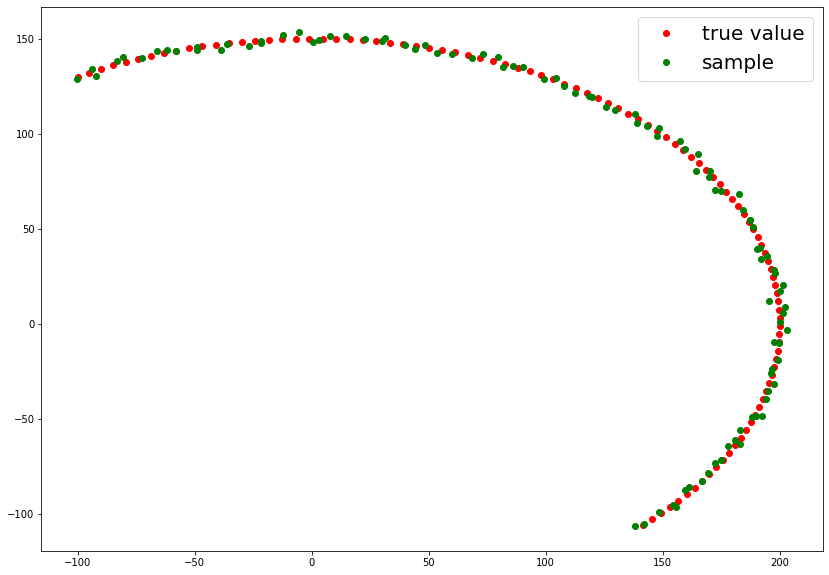

In [307]:
plt.figure(figsize=(14, 10))
plt.plot(ellipse[:, 0], ellipse[:, 1], color="red", linestyle="None", marker='o')
plt.plot(sample[19,0,:, 0], sample[19,0,:, 1], color="green", linestyle="None", marker='o')
plt.legend(["true value","sample"],loc="best",fontsize=20)

In [308]:
def M(coordinate):
    matrix=np.zeros([6,6])
    for i in range(N+1):
        x=coordinate[i][0]
        y=coordinate[i][1]
        x_alpha=np.array([x*x,2.*x*y,y*y,2.*x,2.*y,1.])
        #matrix+=x_alpha*x_alpha.T
        matrix+=np.outer(x_alpha,x_alpha)
    return matrix

In [310]:
#楕円の真のパラメータを計算
m=M(ellipse)
value,vector=eigs(m,1,which="SM")
U_bar=vector.reshape([6])
value,vector,np.linalg.norm(vector,ord=1)
#真の楕円のパラメータ
#u_bar=np.array([2.5*(10**(-5)),4.4*(10**(-5)),0,0,0,-1])

(array([-5.18406937e-07+0.j]),
 array([[ 2.50000000e-05+0.j],
        [-5.61216488e-15+0.j],
        [ 4.44444444e-05+0.j],
        [ 1.52266298e-12+0.j],
        [ 4.92537296e-13+0.j],
        [-9.99999999e-01+0.j]]),
 1.0000694431462)

In [311]:
# 楕円のパラメータを計算
U=np.zeros([sigma_num,generate_num,6])
for i in range(sigma_num):
    for j in range(generate_num):
        m=M(sample[i][j])#行列Mの計算
        value,vector=eigs(m,1,which ="SM") #行列Mに対する最小固有値とそれに対応する固有ベクトル
        U[i][j]=U[i][j]+vector.reshape([6])
        

/var/folders/5q/gwhjzy5s4nl5rhb5x_hsv9z40000gn/T/ipykernel_30538/464105490.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  U[i][j]=U[i][j]+vector.reshape([6])


In [312]:
# RMS誤差の測定
P_u=np.identity(6)-np.outer(U_bar,U_bar)
error=np.zeros([sigma_num,2])
for i in range(sigma_num):
    delta_u=np.zeros([generate_num,6,6])
    for j in range(generate_num):
        a=np.dot(P_u,U[i][j])
        delta_u[j]=delta_u[j]+np.dot(P_u,U[i][j])
    rms=0.
    for j in range(generate_num):
        rms+=(np.linalg.norm(delta_u[j],ord=2))**2
    rms=np.sqrt(rms/generate_num)
    error[i][0]=0.1+0.1*i
    error[i][1]=rms


/var/folders/5q/gwhjzy5s4nl5rhb5x_hsv9z40000gn/T/ipykernel_30538/1144710988.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  delta_u[j]=delta_u[j]+np.dot(P_u,U[i][j])


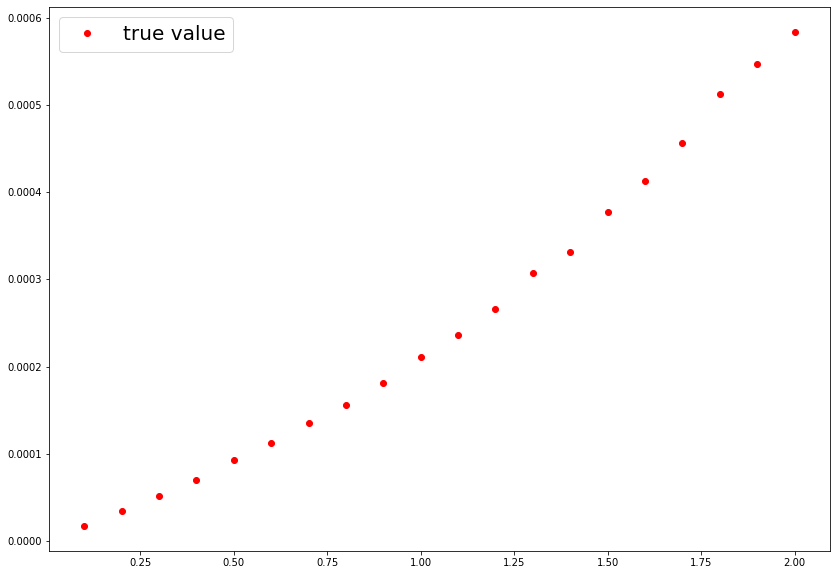

In [313]:
plt.figure(figsize=(14, 10))
plt.plot(error[:, 0], error[:, 1], color="red", linestyle="None", marker='o')
plt.legend(["true value","sample"],loc="best",fontsize=20)